### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Practical activity: Convert, clean, and analyse data

**Scenario**

Having scraped and shared the specific data required by the executives, claims department, and clients of your organisation, you now need to share it with them. You know that none of the stakeholders involved are as tech- or data-savvy as you are, and that you need to share the data with them in a way they can understand and use. To this end, you’ve been asked to download your scraped data as a CSV file. 

Additionally, other data analysts at your organisation want access to your data, and have requested the data also be shared as JSON files. Your analytics department has also asked you to focus on the six continents on the table, and perform several calculations for each of them.

## 1. Import the libraries

In [1]:
# Import necessary libraries.
import requests
import pandas as pd
from bs4 import BeautifulSoup

## 2. Establish connection with URL

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
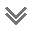

In [2]:
# Create a URL variable.
url = 'https://www.worldometers.info/coronavirus/'

# Create a requests variable.
r = requests.get(url)

# Make contact with the website.
if r.status_code == 200:
    html_doc = r.text
    
# Create a BeautifulSoup object.
soup = BeautifulSoup(html_doc)

# View the output.
print(soup.prettify())

## 3. Extract tabular data

In [3]:
# Extracting the contents of the table with the table id: 
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

# View the output.
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

## 4. Extract table headers

In [4]:
# Now we need to specify BeautifulSoup to go through the table and find everything 
# with a tr tag.
# Note: th = (table header), tr = (table row), and td = table column.
rows = table.find_all('tr', attrs={'style': ""})

# View the output.
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>691,206,292</td>
 <td

In [5]:
# Storage for the extracted data.
# Create an empty list.
output = []

# Specify the column names.
column_names = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

# Create a for loop statement.
for cases in rows:
    cases_data = cases.find_all('td')
    if cases_data:
        # Extract the text within each element.
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))
        
# View the output.
output

[{'Country,Other': '',
  'Total Cases': 'World',
  'New Cases': '691,206,292',
  'Total Deaths': '+464',
  'New Deaths': '6,898,266',
  'Total Recovered': '0',
  'New Recovered': '663,756,361',
  'Active Cases': '+10,672',
  'Serious, Critical': '20,551,665',
  'Tot Cases/ 1M pop': '37,266',
  'Deaths/ 1M pop': '88,675',
  'Total Tests': '885.0',
  'Tests/ 1M pop': '',
  'Population': ''},
 {'Country,Other': '1',
  'Total Cases': 'USA',
  'New Cases': '107,352,160',
  'Total Deaths': '',
  'New Deaths': '1,168,485                                ',
  'Total Recovered': '',
  'New Recovered': '105,509,635',
  'Active Cases': '',
  'Serious, Critical': '674,040',
  'Tot Cases/ 1M pop': '779',
  'Deaths/ 1M pop': '320,641',
  'Total Tests': '3,490',
  'Tests/ 1M pop': '1,180,836,367',
  'Population': '3,526,935'},
 {'Country,Other': '2',
  'Total Cases': 'India',
  'New Cases': '44,994,407',
  'Total Deaths': '',
  'New Deaths': '531,910                                ',
  'Total Recovered

## 5. Convert extracted data into a Panda DataFrame

In [6]:
# Create a DataFrame directly from the output.
data = pd.DataFrame(output)

# View the DataFrame.
data.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,,World,"691,206,292",+464,"6,898,266",0,"663,756,361","+10,672","20,551,665","37,266","88,675",885.0,,
1,1,USA,"107,352,160",,"1,168,485",,"105,509,635",,"674,040",779,"320,641","3,490","1,180,836,367","3,526,935"
2,2,India,"44,994,407",,"531,910",,"44,461,044",,"1,453",N/A,"31,987",378,"930,797,975","661,721"
3,3,France,"40,138,560",,"167,642",,"39,954,415","+2,895","16,503",869,"612,013","2,556","271,490,188","4,139,547"
4,4,Germany,"38,428,685",,"174,352",,"38,240,600",,"13,733",N/A,"458,119","2,078","122,332,384","1,458,359"


## 6. Convert, clean and analyse the data

In [7]:
# Save the DataFrame as a CSV file without index.
data.to_csv('cases.csv', index=False)

In [8]:
# Create a JSON file.
import json

# Create a JSON file.
output_json = json.dumps(output)

# View the output.
output_json

'[{"Country,Other": "", "Total Cases": "World", "New Cases": "691,206,292", "Total Deaths": "+464", "New Deaths": "6,898,266", "Total Recovered": "0", "New Recovered": "663,756,361", "Active Cases": "+10,672", "Serious, Critical": "20,551,665", "Tot Cases/ 1M pop": "37,266", "Deaths/ 1M pop": "88,675", "Total Tests": "885.0", "Tests/ 1M pop": "", "Population": ""}, {"Country,Other": "1", "Total Cases": "USA", "New Cases": "107,352,160", "Total Deaths": "", "New Deaths": "1,168,485                                ", "Total Recovered": "", "New Recovered": "105,509,635", "Active Cases": "", "Serious, Critical": "674,040", "Tot Cases/ 1M pop": "779", "Deaths/ 1M pop": "320,641", "Total Tests": "3,490", "Tests/ 1M pop": "1,180,836,367", "Population": "3,526,935"}, {"Country,Other": "2", "Total Cases": "India", "New Cases": "44,994,407", "Total Deaths": "", "New Deaths": "531,910                                ", "Total Recovered": "", "New Recovered": "44,461,044", "Active Cases": "", "Seri

In [9]:
# Save the JSON file to .json.
with open('cases_json.json', 'w') as f:
    json.dump(output, f)

In [10]:
# Read the JSON using Pandas, output to .csv.
pd.read_json(output_json).to_csv('cases_csv.csv', index=False)

In [11]:
# Import and read the CSV file.
data_csv = pd.read_csv('cases_csv.csv')

# View the data.
print(data_csv.head())

# Import and read the JSON file.
data_json = pd.read_json('cases_json.json')

# View the DataFrame. 
data_json.head()

   Country,Other Total Cases    New Cases  Total Deaths  \
0            NaN       World  691,206,292         464.0   
1            1.0         USA  107,352,160           NaN   
2            2.0       India   44,994,407           NaN   
3            3.0      France   40,138,560           NaN   
4            4.0     Germany   38,428,685           NaN   

                                  New Deaths  Total Recovered New Recovered  \
0                                  6,898,266              0.0   663,756,361   
1  1,168,485                                              NaN   105,509,635   
2    531,910                                              NaN    44,461,044   
3    167,642                                              NaN    39,954,415   
4    174,352                                              NaN    38,240,600   

  Active Cases Serious, Critical Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  \
0      +10,672        20,551,665            37,266         88,675       885.0   
1       

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,,World,"691,206,292",+464,"6,898,266",0,"663,756,361","+10,672","20,551,665","37,266","88,675",885.0,,
1,1,USA,"107,352,160",,"1,168,485",,"105,509,635",,"674,040",779,"320,641","3,490","1,180,836,367","3,526,935"
2,2,India,"44,994,407",,"531,910",,"44,461,044",,"1,453",N/A,"31,987",378,"930,797,975","661,721"
3,3,France,"40,138,560",,"167,642",,"39,954,415","+2,895","16,503",869,"612,013","2,556","271,490,188","4,139,547"
4,4,Germany,"38,428,685",,"174,352",,"38,240,600",,"13,733",N/A,"458,119","2,078","122,332,384","1,458,359"


In [12]:
# View the CSV and JSON DataFrames.
print(data_csv.dtypes)
print(data_csv.columns)

print(data_json.dtypes)
print(data_json.columns)

Country,Other        float64
Total Cases           object
New Cases             object
Total Deaths         float64
New Deaths            object
Total Recovered      float64
New Recovered         object
Active Cases          object
Serious, Critical     object
Tot Cases/ 1M pop     object
Deaths/ 1M pop        object
Total Tests           object
Tests/ 1M pop         object
Population            object
dtype: object
Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
       'Total Tests', 'Tests/ 1M pop', 'Population'],
      dtype='object')
Country,Other        object
Total Cases          object
New Cases            object
Total Deaths         object
New Deaths           object
Total Recovered      object
New Recovered        object
Active Cases         object
Serious, Critical    object
Tot Cases/ 1M pop    object
Deaths/ 1M pop  

In [13]:
# Create a subset.
data_report = data_csv[['Country,Other', 'Total Cases', 'Total Deaths',
                        'Total Recovered', 'Active Cases', 'Serious, Critical']]

# View the column names.
print(data_report.columns)
data_report

Index(['Country,Other', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Serious, Critical'],
      dtype='object')


,"Country,Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical"
0,NaN,World,464.0,0.0,"+10,672","20,551,665"
1,1.0,USA,NaN,NaN,NaN,"674,040"
2,2.0,India,NaN,NaN,NaN,"1,453"
3,3.0,France,NaN,NaN,"+2,895","16,503"
4,4.0,Germany,NaN,NaN,NaN,"13,733"
...,...,...,...,...,...,...
206,224.0,Montserrat,NaN,NaN,NaN,19
207,225.0,Niue,1.0,NaN,NaN,1
208,228.0,Tokelau,NaN,NaN,NaN,23
209,231.0,China,NaN,NaN,NaN,"118,977"


In [14]:
# Determine missing values.
data_report.isnull().sum()

Country,Other          2
Total Cases            0
Total Deaths         204
Total Recovered      209
Active Cases         200
Serious, Critical     20
dtype: int64

In [15]:
# Save the DataFrame as a CSV file without index.
data_report.to_csv('cases_report.csv', index=False)

In [16]:
# View the saved CSV.
cases_report = pd.read_csv('cases_report.csv')

# View the DataFrame.
cases_report.head()

,"Country,Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical"
0,NaN,World,464.0,0.0,"+10,672","20,551,665"
1,1.0,USA,NaN,NaN,NaN,"674,040"
2,2.0,India,NaN,NaN,NaN,"1,453"
3,3.0,France,NaN,NaN,"+2,895","16,503"
4,4.0,Germany,NaN,NaN,NaN,"13,733"
